<h1 style="color:navy" align ="center"> Web Scraping </h1>
<h3 style="color:#99180B " align ="center">Scraping : खुरचना </h3>
<h3 style="color:blue ">Web scraping is an automated method used to extract large amounts of data from websites. The data on the websites are unstructured. Web scraping helps collect these unstructured data and store it in a structured form. </h3>

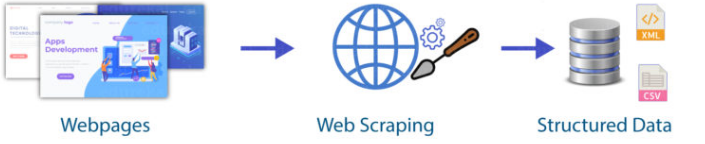
<h2 style="color:navy">Is Web Scraping Legal?</h2>
<h3 style="color:blue ">Talking about whether web scraping is legal or not, some websites allow web scraping and some don’t. </h3>

<h2 style="color:navy"> What is Web Scraping used for ?</h2>
<h3 style="color:blue ">Web Scraping has multiple applications across various industries :<br>1. Price Monitoring<br>2. Market Research<br>3. News Monitoring<br>4. Sentiment Analysis</h3>

<h2 style="color:navy" align ="center"> required third-party libraries </h2>
<h3 style="color:blue ">pip install requests<br>pip install urllib3<br>pip install html5lib<br>pip install bs4</h3>

### Scrapping Product Name,Rating,Price from flipkart

In [1]:
from bs4 import BeautifulSoup as bs
from urllib.request import urlopen

In [2]:
url = "https://www.flipkart.com/laptops/pr?sid=6bo,b5g&otracker=categorytree&fm=neo%2Fmerchandising&iid=M_7999826a-2b55-42f5-aeab-6d52788d4111_1_372UD5BXDFYS_MC.34WHNYFH5V2Y&otracker=hp_rich_navigation_13_1.navigationCard.RICH_NAVIGATION_Electronics~Laptop%2Band%2BDesktop_34WHNYFH5V2Y&cid=34WHNYFH5V2Y"

In [4]:
ureq = urlopen(url)
page_html = ureq.read()
ureq.close()

In [5]:
# print(page_html)
# print(type(page_html))

In [2]:
page_soup = bs(page_html,'html.parser')

NameError: name 'page_html' is not defined

In [7]:
# print(page_soup)
# print(type(page_soup))
print(page_soup.title)

<title>Laptops Online - Budget Laptops at Best Prices in India at Flipkart.com</title>


In [3]:
Laptops = page_soup.findAll('div',{'class':'_13oc-S'})

NameError: name 'page_soup' is not defined

In [9]:
print(len(Laptops))

24


In [10]:
Laptop = Laptops[0]

In [11]:
name = Laptop.findAll('div',{'class':'_4rR01T'})
#print(name)
name = name[0]
#print(name)
name = name.text
#print(name)
name = name.split(')')
#print(name)
name = name[0] + ')'
print(name)

Dell Inspiron 3505 Ryzen 3 Dual Core 3250U - (8 GB/256 GB SSD/Windows 10 Home)


In [12]:
rating = Laptop.findAll('div',{'class','_3LWZlK'})
#print(rating)
rating = rating[0].text
print(rating)

4.3


In [13]:
price = Laptop.findAll('div',{'class':'_30jeq3 _1_WHN1'})
price = price[0].text
print(price)
price = price.replace(',','')
print(price)
price = price.replace('₹','')
print(price)

₹34,790
₹34790
34790


In [14]:
for Laptop in Laptops:
    name = Laptop.findAll('div',{'class':'_4rR01T'})
    name = name[0].text
    name = name.split('-')
    final_name = name[0]

    rating = Laptop.findAll('div',{'class','_3LWZlK'})
    if rating:
        final_rating = rating[0].text
    else:
        final_rating = '-'
    
    price = Laptop.findAll('div',{'class':'_30jeq3 _1_WHN1'})
    if price:
        price = price[0].text
        price = price.replace(',','')
        final_price = price.replace('₹','')
    else:
        final_price ='-'

    print(final_name,final_rating,final_price)

Dell Inspiron 3505 Ryzen 3 Dual Core 3250U - (8 GB/256 GB SSD/Windows 10 Home) 4.3 34790
HP 14 Core i5 10th Gen - (8 GB/512 GB SSD/Windows 10 Home) 4.3 47990
Asus Core i3 10th Gen - (8 GB/1 TB HDD/Windows 10 Home) - 33990
Lenovo Ideapad S145 Ryzen 5 Quad Core 3500U - (8 GB/512 GB SSD/Windows 10 Home) 4.2 42990
MSI Modern 14 Ryzen 5 Hexa Core 4500U - (8 GB/512 GB SSD/Windows 10 Home) 4.6 51990
Lenovo Ideapad Slim 3i Core i3 10th Gen - (8 GB/256 GB SSD/Windows 10 Home) 4.4 35990
Lenovo Ideapad S145 Core i3 10th Gen - (4 GB/256 GB SSD/Windows 10 Home) 4.3 32990
Asus VivoBook 15 Core i5 10th Gen - (8 GB/1 TB HDD/Windows 10 Home) 3.9 42990
Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 4600H - (8 GB/1 TB HDD/256 GB SSD/Windows 10 Home/4 GB Graph...) 4.5 59990
HP 15s Ryzen 3 Dual Core 3250U - (4 GB/1 TB HDD/Windows 10 Home) 4.4 30990
Dell Vostro Core i3 10th Gen - (8 GB/256 GB SSD/Windows 10 Home) 4.4 38199
HP 15 Ryzen 3 Dual Core 3200U - (4 GB/1 TB HDD/Windows 10 Home) 4.1 31490
Lenovo Ideapad 3

In [17]:
laptop_list = [('Name','Rating','Price')]
for Laptop in Laptops:
    name = Laptop.findAll('div',{'class':'_4rR01T'})
    name = name[0].text
    name = name.split('-')
    final_name = name[0] 

    rating = Laptop.findAll('div',{'class','_3LWZlK'})
    if rating:
        final_rating = rating[0].text
    else:
        final_rating = '-'
    
    price = Laptop.findAll('div',{'class':'_30jeq3 _1_WHN1'})
    if price:
        price = price[0].text
        price = price.replace(',','')
        final_price = price.replace('₹','')
    else:
        final_price ='-'

    laptop_list.append((final_name,final_rating,final_price))
#print(laptop_list)

# Use 'pip install tabulate' to install module
from tabulate import tabulate
print(tabulate(laptop_list,tablefmt='fancy_grid'))

╒═══════════════════════════════════════════════════╤════════╤═══════╕
│ Name                                              │ Rating │ Price │
├───────────────────────────────────────────────────┼────────┼───────┤
│ Dell Inspiron 3505 Ryzen 3 Dual Core 3250U )      │ 4.3    │ 34790 │
├───────────────────────────────────────────────────┼────────┼───────┤
│ HP 14 Core i5 10th Gen )                          │ 4.3    │ 47990 │
├───────────────────────────────────────────────────┼────────┼───────┤
│ Asus Core i3 10th Gen )                           │ -      │ 33990 │
├───────────────────────────────────────────────────┼────────┼───────┤
│ Lenovo Ideapad S145 Ryzen 5 Quad Core 3500U )     │ 4.2    │ 42990 │
├───────────────────────────────────────────────────┼────────┼───────┤
│ MSI Modern 14 Ryzen 5 Hexa Core 4500U )           │ 4.6    │ 51990 │
├───────────────────────────────────────────────────┼────────┼───────┤
│ Lenovo Ideapad Slim 3i Core i3 10th Gen )         │ 4.4    │ 35990 │
├─────

## Scrapping Motorola Phones

In [19]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [20]:
my_url = 'https://www.flipkart.com/search?sid=tyy%2C4io&otracker=CLP_Filters&p%5B%5D=facets.brand%255B%255D%3DMotorola'

In [21]:
ureq = urlopen(my_url)
page_html = ureq.read()
ureq.close()

In [22]:
page_soup = BeautifulSoup(page_html,'html.parser')

In [23]:
Mobiles = page_soup.findAll('div',{'class':'_13oc-S'})

In [24]:
print(len(Mobiles))

24


In [26]:
name = Mobile.findAll('div',{'class':'_4rR01T'})
    name = name[0].text
    name = name.split(')')
    final_name = name[0] + ')'
    final_name = final_name.replace(',',' |')

IndentationError: unexpected indent (<ipython-input-26-533a1e6a8acb>, line 2)

In [25]:
for Mobile in Mobiles:
    name = Mobile.findAll('div',{'class':'_4rR01T'})
    name = name[0].text
    name = name.split(')')
    final_name = name[0] + ')'
    final_name = final_name.replace(',',' |')

    rating = Mobile.findAll('div',{'class':'_3LWZlK'})
    if rating:
        final_rating = rating[0].text
    else:
        final_rating = '-'
    
    price = Mobile.findAll('div',{'class':'_30jeq3 _1_WHN1'})
    if price:
        price = price[0].text
        price = price.replace(',','')
        final_price = price.replace('₹','')
    else:
        final_price ='-'

    print(final_name,final_rating,final_price)

Motorola E7 Power (Tahiti Blue | 64 GB) 4.3 8299
Motorola E7 Plus (Misty Blue | 64 GB) 4.2 9999
Motorola E7 Power (Coral Red | 64 GB) 4.3 8299
Motorola G9 Power (Electric Violet | 64 GB) 4.1 11999
Moto G 5G (Volcanic Grey | 128 GB) 4.2 20999
Motorola G9 (Sapphire Blue | 64 GB) 4.2 10999
Moto G 5G (Frosted Silver | 128 GB) 4.2 20999
Motorola Razr (Gold | 128 GB) 3.7 74999
Motorola One Action (Denim Blue | 128 GB) 4.2 10999
Moto One (Black | 64 GB) 4.1 14999
Motorola Edge+ (Thunder Grey | 256 GB) 4.1 64999
Motorola Razr (Black | 128 GB) 3.7 74999
Motorola Razr 5G (Polished Graphite | 256 GB) 4.1 124999
Moto G6 (Indigo Black | 32 GB) 4.2 9999
Moto Turbo (Black | 64 GB) 4.2 31999
Moto X Play(With Turbo Charger) 4.2 17499
Moto X (2nd Generation) 4.2 24999
Moto E 4th Gen (Iron Gray | 16 GB) 4 8499
Moto G4 Plus (White | 32 GB) 4 12990
Moto X (2nd Generation) 4.2 23999
Moto C Plus (Pearl White | 16 GB) 4.2 6900
Moto G (3rd Generation) 4.3 10999
Moto G6 (Indigo Black | 64 GB) 4.2 20000
Moto E5 

In [ ]:
mobile_list = [('Name','Rating','Price')]
for Mobile in Mobiles:
    name = Mobile.findAll('div',{'class':'_3wU53n'})
    name = name[0].text
    name = name.split(')')
    final_name = name[0] + ')'
    final_name = final_name.replace(',',' |')

    rating = Mobile.findAll('div',{'class':'hGSR34'})
    if rating:
        final_rating = rating[0].text
    else:
        final_rating = '-'
    
    price = Mobile.findAll('div',{'class':'_1vC4OE _2rQ-NK'})
    if price:
        price = price[0].text
        price = price.replace(',','')
        final_price = price.replace('₹','')
    else:
        final_price ='-'

    mobile_list.append((final_name,final_rating,final_price))
    
from tabulate import tabulate
print(tabulate(mobile_list,tablefmt="pipe"))